In [1]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# EDA

In [2]:
# figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [3]:
bank = pd.read_csv('/Users/bryton/Desktop/DataSets-main/bank-additional/bank-additional.csv', sep=';')

In [4]:
bank.shape

(4119, 21)

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [7]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

1. there are no null values in our dataset
2. there are 10 numerical features and 10 categorial features

## [Attribute Information](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing):

## Input variables:
### bank client data:
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')\
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')\
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
14 - previous: number of contacts performed before this campaign and for this client (numeric)\
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')\
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\
17 - cons.price.idx: consumer price index - monthly indicator (numeric)\
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\
20 - nr.employed: number of employees - quarterly indicator (numeric)\

## Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [8]:
bank.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.400000       92.201000     -50.800000     0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000     1.334000  5099.100000  
50%        1.100000       93.749000     -41.800000     4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.961000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

In [9]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Target variable y

no     3668
yes     451
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

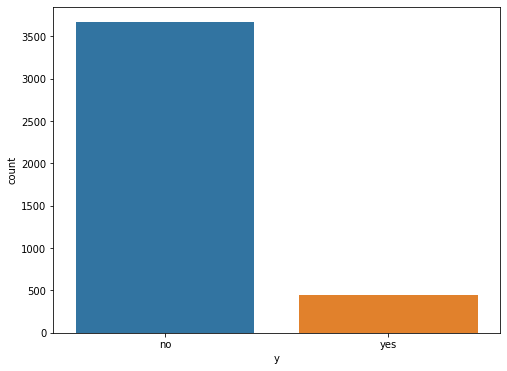

In [10]:
# count plot for deposit
print(bank['y'].value_counts())
sns.countplot(data=bank,x=bank['y'])

#### Note: The dataset is highly imbalanced, we could not simply look at the accuracy since it can't work well with highly imbalanced data, thus we choose ROC-AUC as our metric

### Age

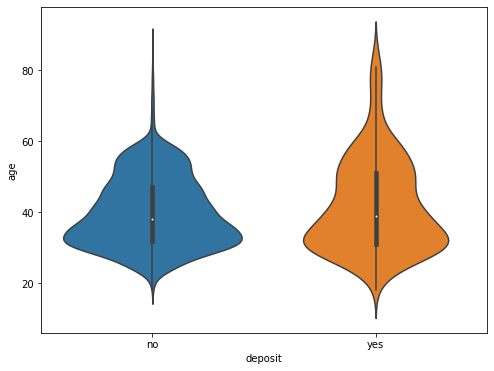

In [11]:
#violin plot for age
sns.violinplot(x="y", y="age", data=bank, size=8)
plt.xlabel('deposit')
plt.show()

For age feature, the client subscribed a term deposit('yes') is has more spread than client who do not subscribe to a term deposit('no') .

### Job

In [12]:
bank["job"].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

<AxesSubplot:xlabel='job'>

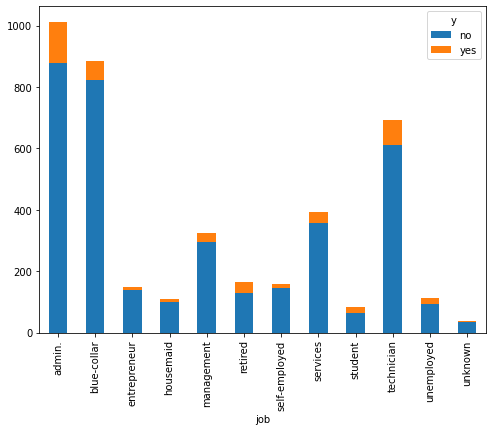

In [13]:
job_types = bank.groupby("job")['y'].value_counts(normalize=False).unstack()
job_types.plot(kind='bar', stacked='True')

The largest clients in this category belong to admin jobs with percentage of 30 while unknown category has least count.

### Marital

<AxesSubplot:xlabel='marital'>

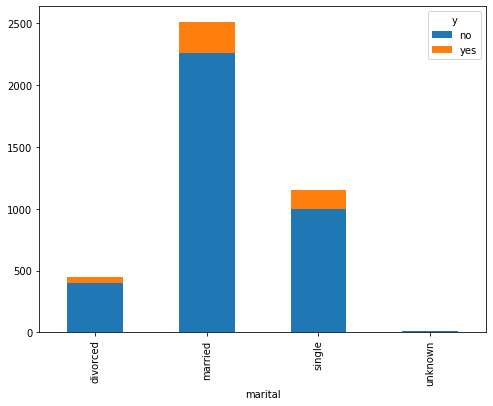

In [14]:
marital_types = bank.groupby("marital")['y'].value_counts(normalize=False).unstack()
marital_types.plot(kind='bar', stacked='True')

Married clients constitute the largest portion of this feature.

### Education

In [15]:
bank["education"].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

<AxesSubplot:xlabel='education'>

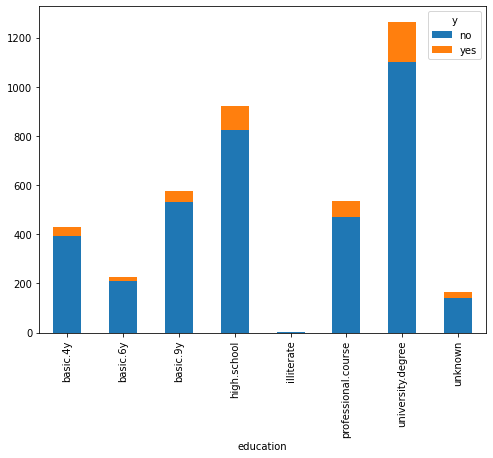

In [16]:
education_types = bank.groupby("education")['y'].value_counts(normalize=False).unstack()
education_types.plot(kind='bar', stacked='True')

Most of the bank clients have a university degree. The clients has university degree education has larger ratio of clients saying yes to term deposit than any other category.

### Default

In [17]:
bank["default"].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

<AxesSubplot:xlabel='default'>

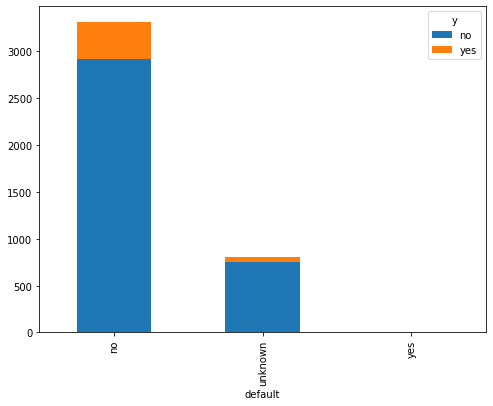

In [18]:
default_types = bank.groupby("default")['y'].value_counts(normalize=False).unstack()
default_types.plot(kind='bar', stacked='True')

Most of bank clients don’t have credit as default.

### Housing

In [19]:
bank["housing"].value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing'>

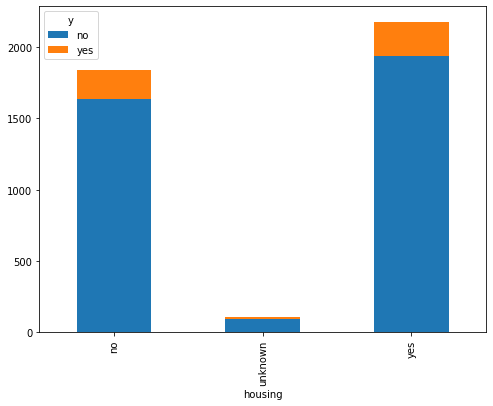

In [20]:
housing_types = bank.groupby("housing")['y'].value_counts(normalize=False).unstack()
housing_types.plot(kind='bar', stacked='True')

Most of the clients tends to do not subscribe to the term deposit.

### Loan

In [21]:
bank["loan"].value_counts()

no         3349
yes         665
unknown     105
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan'>

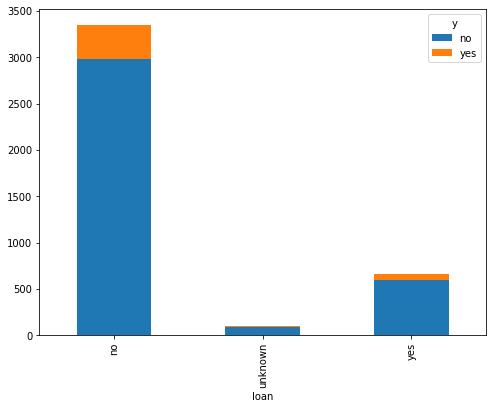

In [22]:
loan_types = bank.groupby("loan")['y'].value_counts(normalize=False).unstack()
loan_types.plot(kind='bar', stacked='True')

Most of the bank client don’t already have personal loan in bank.

### Contact

In [23]:
bank['contact'].value_counts()

cellular     2652
telephone    1467
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact'>

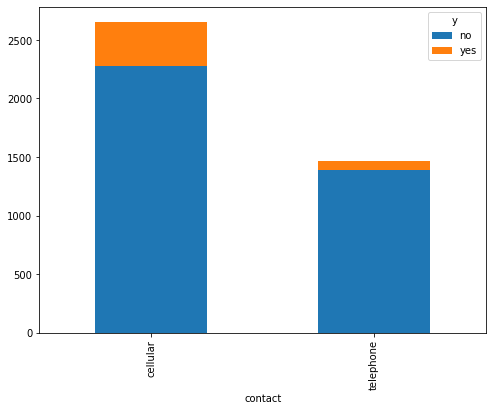

In [24]:
contact_types = bank.groupby("contact")['y'].value_counts(normalize=False).unstack()
contact_types.plot(kind='bar', stacked='True')

Most of the contact were conducted by cellular.

### Month

In [25]:
bank['month'].value_counts()

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: month, dtype: int64

<AxesSubplot:xlabel='month'>

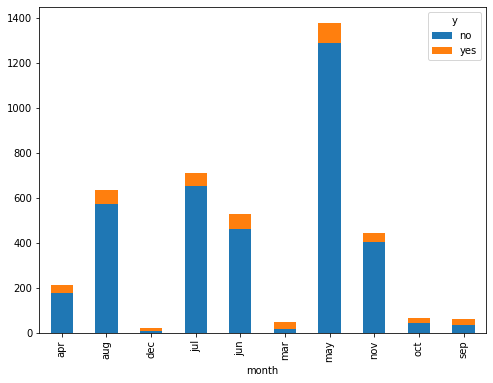

In [26]:
month_types = bank.groupby("month")['y'].value_counts(normalize=False).unstack()
month_types.plot(kind='bar', stacked='True')

Data for Janurary and Feberary is missing. Maximum clients were contacted in May.

### day of week

In [27]:
bank["day_of_week"].value_counts()

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='day_of_week'>

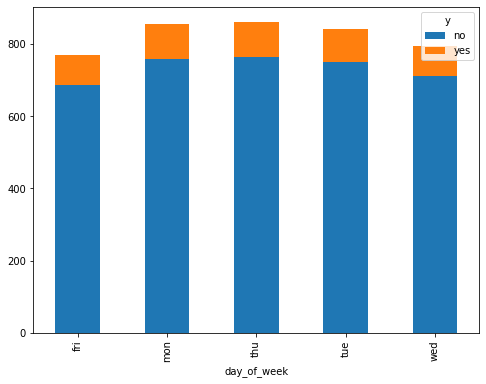

In [28]:
day_types = bank.groupby("day_of_week")['y'].value_counts(normalize=False).unstack()
day_types.plot(kind='bar', stacked='True')

Typically, client were contacted in Monday, Thursday in the week

### Duration

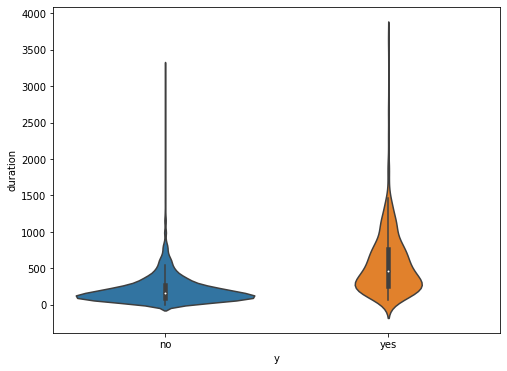

In [29]:
sns.violinplot(x="y", y="duration", data=bank, size=8)
plt.show()

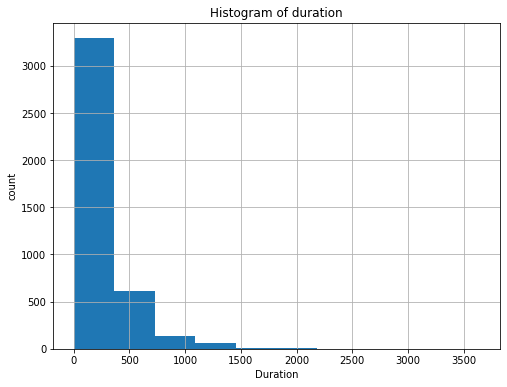

In [30]:
bank['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

A histogram is plotted for this and there are very less number of clients having very long duration. Violin plot indicates that people with longer duration have more possibility of saying yes to deposit.

### Campaign

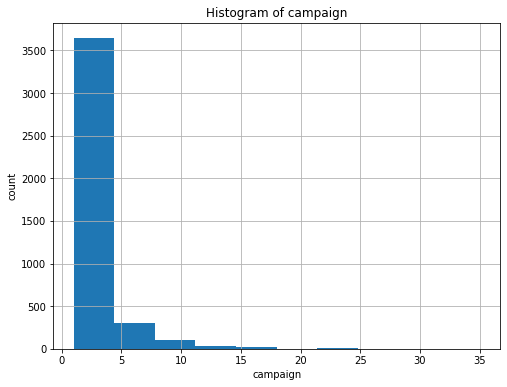

In [31]:
bank['campaign'].hist()
plt.title('Histogram of campaign')
plt.ylabel('count')
plt.xlabel('campaign');
plt.show()

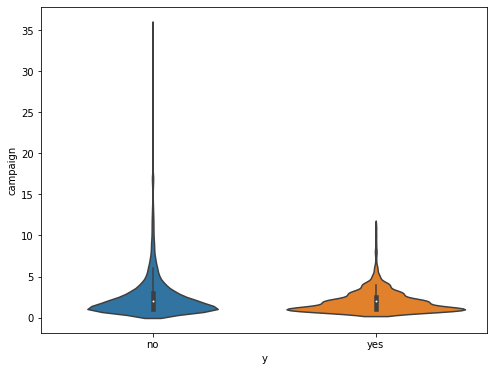

In [32]:
#violin plot for campaign
sns.violinplot(x="y", y="campaign", data=bank, size=8)
plt.show()

Number of contacts to a specific client performed during a campaign is less than 5 times.

### pdays

In [33]:
bank['pdays'].value_counts()

999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
16        2
13        2
18        2
0         2
15        2
19        1
17        1
11        1
21        1
14        1
Name: pdays, dtype: int64

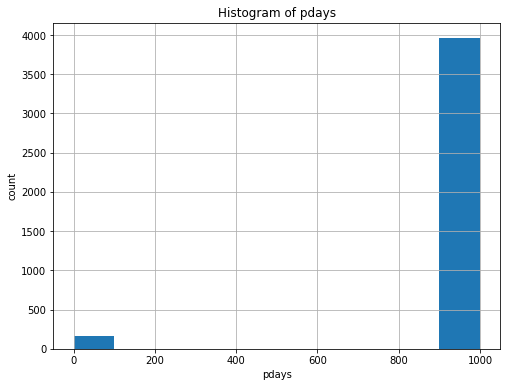

In [34]:
bank['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays')
plt.show()

Most of the bank clients were not previously contacted so the 'pdays' shows '999'

### Previous

In [35]:
bank['previous'].value_counts()

0    3523
1     475
2      78
3      25
4      14
5       2
6       2
Name: previous, dtype: int64

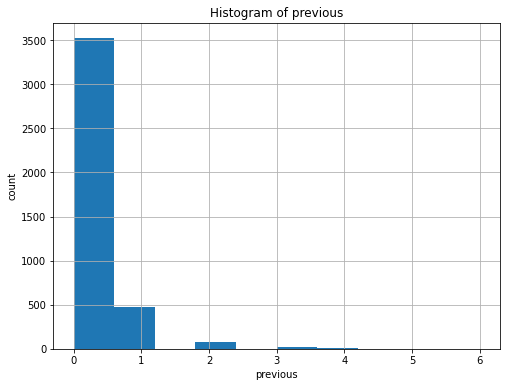

In [36]:
bank['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous')
plt.show()

Typically, a client would not be contact more than 6 times in during a campaign. The histogram shows most of the bank client were not contacted.

### poutcome

In [37]:
bank["poutcome"].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome'>

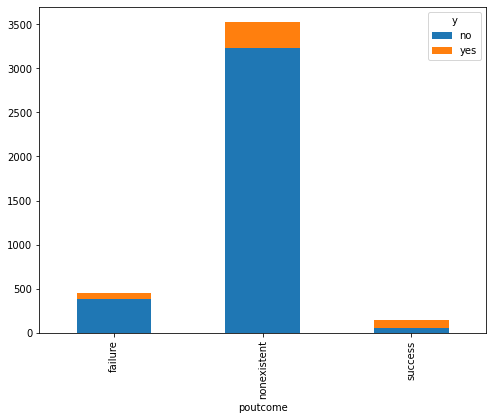

In [38]:
# bar chart for poutcome
poutcome_types = bank.groupby("poutcome")['y'].value_counts(normalize=False).unstack()
poutcome_types.plot(kind='bar', stacked='True')

The outcome of previous marketing campaign. The picture shows that many of the bank client were not contact in the previous campaign.

# Preprocessing

In [39]:
#changing the value 999 in pdays column to  value 0 
def change(row):
    if(row['pdays']==999):
        return 0;
    return row['pdays'];
bank['pdays']= bank.apply(lambda row: change(row),axis=1)

#changing the type of pdays to int
bank['pdays']=bank['pdays'].astype(int)
bank.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2      0         0  nonexistent   
1  telephone   may         fri  ...         4      0         0  nonexistent   
2  telephone   jun         wed  ...         1      0         0  nonexistent   
3  telephone   jun         fri  ...         3      0         0  nonexistent   
4   cellular   nov         mon  ...         1      0         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [40]:
bank_onehot = bank.copy(deep = True)

In [41]:
idx_numeric=[0,10,11,12,13,15,16,17,18,19]
scaler = StandardScaler()
bank_onehot[bank_onehot.columns[idx_numeric]] = scaler.fit_transform(bank_onehot[bank_onehot.columns[idx_numeric]])

In [42]:
bank_onehot.head()

age          job  marital          education default  housing  \
0 -0.980752  blue-collar  married           basic.9y      no      yes   
1 -0.107991     services   single        high.school      no       no   
2 -1.465619     services  married        high.school      no      yes   
3 -0.204965     services  married           basic.9y      no  unknown   
4  0.667795       admin.  married  university.degree      no      yes   

      loan    contact month day_of_week  ...  campaign     pdays  previous  \
0       no   cellular   may         fri  ... -0.209228 -0.166358 -0.351356   
1       no  telephone   may         fri  ...  0.569634 -0.166358 -0.351356   
2       no  telephone   jun         wed  ... -0.598660 -0.166358 -0.351356   
3  unknown  telephone   jun         fri  ...  0.180203 -0.166358 -0.351356   
4       no   cellular   nov         mon  ... -0.598660 -0.166358 -0.351356   

      poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent    -1.206054       -1.185448      -1.240939  -1.331707   
1  nonexistent     0.649441        0.715193       0.892269   0.711698   
2  nonexistent     0.841389        1.528273      -0.283172   0.773427   
3  nonexistent     0.841389        1.528273      -0.283172   0.771697   
4  nonexistent    -0.118350       -0.655478      -0.326707   0.328632   

   nr.employed   y  
0    -0.914779  no  
1     0.332862  no  
2     0.836535  no  
3     0.836535  no  
4     0.398028  no  

[5 rows x 21 columns]

### One-Hot Encoding

1. Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
2. Tree based Algorithms are scale independant

In [43]:
nominal = ['job','marital','education','contact','month','day_of_week']
bank_onehot = pd.get_dummies(bank_onehot,columns=nominal)
bank_onehot['y']=bank_onehot['y'].map({'yes': 1,'no': 0})

In [44]:
bank_onehot['poutcome'] = bank_onehot['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
bank_onehot['default'] = bank_onehot['default'].map({'yes': -1,'unknown': 0,'no': 1})
bank_onehot['housing'] = bank_onehot['housing'].map({'yes': -1,'unknown': 0,'no': 1})
bank_onehot['loan'] = bank_onehot['loan'].map({'yes': -1,'unknown': 0,'no': 1})
bank_onehot.head()

age  default  housing  loan  duration  campaign     pdays  previous  \
0 -0.980752        1       -1     1  0.903952 -0.209228 -0.166358 -0.351356   
1 -0.107991        1        1     1  0.350300  0.569634 -0.166358 -0.351356   
2 -1.465619        1       -1     1 -0.116966 -0.598660 -0.166358 -0.351356   
3 -0.204965        1        0     0 -0.941553  0.180203 -0.166358 -0.351356   
4  0.667795        1       -1     1 -0.780563 -0.598660 -0.166358 -0.351356   

   poutcome  emp.var.rate  ...  month_mar  month_may  month_nov  month_oct  \
0         0     -1.206054  ...          0          1          0          0   
1         0      0.649441  ...          0          1          0          0   
2         0      0.841389  ...          0          0          0          0   
3         0      0.841389  ...          0          0          0          0   
4         0     -0.118350  ...          0          0          1          0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0                1                0                0   
1          0                1                0                0   
2          0                0                0                0   
3          0                1                0                0   
4          0                0                1                0   

   day_of_week_tue  day_of_week_wed  
0                0                0  
1                0                0  
2                0                1  
3                0                0  
4                0                0  

[5 rows x 56 columns]

In [45]:
bank_onehot.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of

### Correlation with target variable

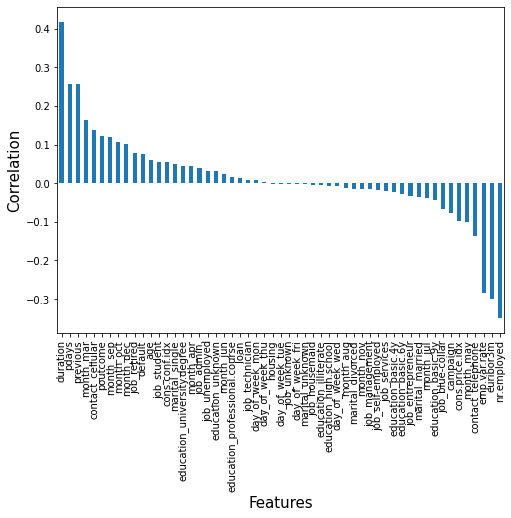

In [46]:
CorrBank1=bank_onehot.drop("y", axis=1).apply(lambda x: x.corr(bank_onehot.y))
Corr1=CorrBank1.sort_values(ascending=False)
Corr1.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
2. If the call duration is more , there are higher chances of getting a yes from the client.
3. pdays , previous, month, age are also highly correlated

### Label Encoding

In [47]:
le = LabelEncoder()
bank_le = bank.copy(deep = True)

idx_numeric=[0,10,11,12,13,15,16,17,18,19]
scaler = MinMaxScaler()
bank_le[bank_le.columns[idx_numeric]] = scaler.fit_transform(bank_le[bank_le.columns[idx_numeric]])

bank_le.job = le.fit_transform(bank.job)
bank_le.marital = le.fit_transform(bank.marital)
bank_le.education = le.fit_transform(bank.education)
bank_le.default = le.fit_transform(bank.default)
bank_le.housing = le.fit_transform(bank.housing)
bank_le.loan = le.fit_transform(bank.loan)
bank_le.contact = le.fit_transform(bank.contact)
bank_le.month = le.fit_transform(bank.month)
bank_le.day_of_week = le.fit_transform(bank.day_of_week)
bank_le.poutcome = le.fit_transform(bank.poutcome)
bank_le.y = le.fit_transform(bank.y)
bank_le.head()

age  job  marital  education  default  housing  loan  contact  month  \
0  0.171429    1        1          2        0        2     0        0      6   
1  0.300000    7        2          3        0        0     0        1      6   
2  0.100000    7        1          3        0        2     0        1      4   
3  0.285714    7        1          2        0        1     1        1      4   
4  0.414286    0        1          6        0        2     0        0      7   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...  0.029412    0.0       0.0         1      0.333333   
1            0  ...  0.088235    0.0       0.0         1      0.937500   
2            4  ...  0.000000    0.0       0.0         1      1.000000   
3            0  ...  0.058824    0.0       0.0         1      1.000000   
4            1  ...  0.000000    0.0       0.0         1      0.687500   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0        0.269680       0.192469   0.153741     0.512287  0  
1        0.698753       0.602510   0.956916     0.859735  0  
2        0.882307       0.376569   0.981179     1.000000  0  
3        0.882307       0.376569   0.980499     1.000000  0  
4        0.389322       0.368201   0.806349     0.877883  0  

[5 rows x 21 columns]

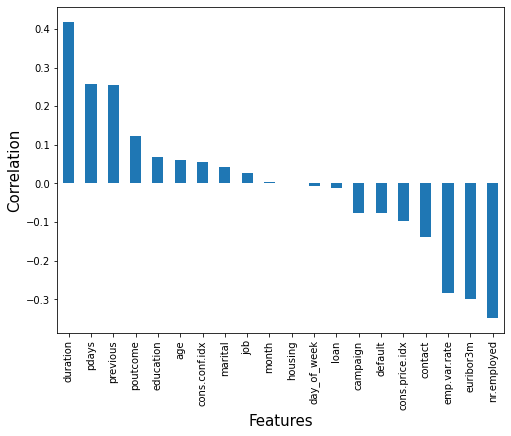

In [48]:
CorrBank2=bank_le.drop("y", axis=1).apply(lambda x: x.corr(bank_le.y))
Corr2=CorrBank2.sort_values(ascending=False)
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
2. If the call duration is more , there are higher chances of getting a yes from the client.
3. pdays , previous, previous contact, education, age are also highly correlated

## Train Test Split

In [49]:
y_onehot = bank_onehot['y']
y_le = bank_le['y']

In [50]:
bank_onehot.drop(['y'], axis = 1, inplace = True)
bank_le.drop(['y'], axis = 1 , inplace = True)

In [51]:
# 20% Data is set aside for tesing
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(bank_onehot, y_onehot, test_size=0.20, random_state=0)
#X_train_onehot, X_cv_onehot, y_train_onehot, y_cv_onehot = train_test_split(X_train_onehot, y_train_onehot, test_size=0.20, random_state=0)
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(bank_le, y_le, test_size=0.20, random_state=0)
#X_train_le, X_cv_le, y_train_le, y_cv_le = train_test_split(X_train_le, y_train_le, test_size=0.20, random_state=0)

# Modeling

## Naïve Bayes - Baseline

In [52]:
gnb = GaussianNB()

gnb.fit(X_train_onehot, y_train_onehot)
gnb_pred = gnb.predict(X_test_onehot)

accNB = accuracy_score(y_test_onehot, gnb_pred)

y_train_pred_prob = gnb.predict_proba(X_train_onehot)
y_test_pred_prob = gnb.predict_proba(X_test_onehot)
train_auc_NB = roc_auc_score(y_train_onehot, y_train_pred_prob[:,1])
test_auc_NB = roc_auc_score(y_test_onehot,  y_test_pred_prob[:,1])
fprNB_train, tprNB_train, thresholds_train = roc_curve(y_train_onehot, y_train_pred_prob[:,1])
fprNB_test, tprNB_test, thresholds_test = roc_curve(y_test_onehot, y_test_pred_prob[:,1])
aucScoreNB = roc_auc_score(y_test_onehot,  gnb_pred)
recallLR=recall_score(y_test_onehot, gnb_pred)

predT=gnb.predict(X_train_onehot)

print(confusion_matrix(y_test_onehot,gnb_pred))
print(classification_report(y_test_onehot,gnb_pred))
print("Train AUC score for NB is ",train_auc_NB)
print("Test AUC score for NB is ",test_auc_NB)

print("Train Accuracy score for NB is ",accuracy_score(y_train_onehot, predT))
# print("Best parameters for NB are ",gnb.best_params_)
print("Recall score for NB is ",recall_score(y_test_onehot, gnb_pred))

[[592 156]
 [ 22  54]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       748
           1       0.26      0.71      0.38        76

    accuracy                           0.78       824
   macro avg       0.61      0.75      0.62       824
weighted avg       0.90      0.78      0.82       824

Train AUC score for NB is  0.8391593607305936
Test AUC score for NB is  0.7946365747255839
Train Accuracy score for NB is  0.7817905918057663
Recall score for NB is  0.7105263157894737


Note that although we calculate the accuracy score for Naïve Bayes method here, we still choose AUC score as our metrics since the dataset is highly imbalanced.

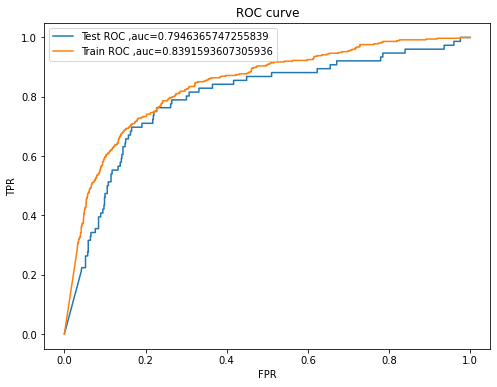

---------------------------
AUC on Test data is 0.7946365747255839
AUC on Train data is 0.8391593607305936


In [53]:
#plot ROC curve
x_nb = plt.subplot()
x_nb.plot(fprNB_test, tprNB_test, label ='Test ROC ,auc='+str(test_auc_NB))
x_nb.plot(fprNB_train, tprNB_train, label= 'Train ROC ,auc='+str(train_auc_NB))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x_nb.legend()
plt.show()

print("---------------------------")

print("AUC on Test data is " +str(test_auc_NB))
print("AUC on Train data is " +str(train_auc_NB))

In [54]:
results=pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
nb = ['Naïve Bayes','GaussianNB',"None", train_auc_NB, test_auc_NB]
results.loc[0] = nb

In [55]:
results.head()

model  Classifier hyper perameter  Train-AUC  Test-AUC
0  Naïve Bayes  GaussianNB            None   0.839159  0.794637

## KNN

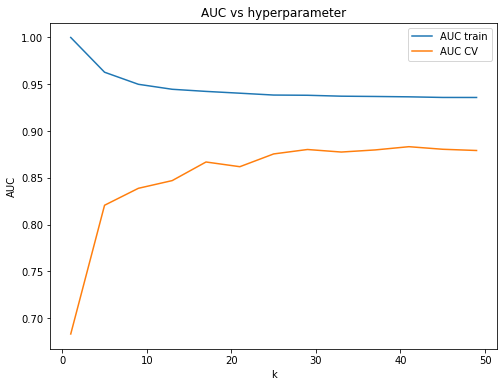

optimal k for which auc is maximum :  41


In [56]:
k = list(range(1,50,4))

knn_train_auc = []
knn_cv_auc = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_onehot, y_train_onehot)
    knn_prob_cv = knn.predict_proba(X_test_onehot)[:,1]
    knn_cv_auc.append(roc_auc_score(y_test_onehot, knn_prob_cv))
    prob_train_knn = knn.predict_proba(X_train_onehot)[:,1]
    knn_train_auc.append(roc_auc_score(y_train_onehot, prob_train_knn))

optimal_k = k[knn_cv_auc.index(max(knn_cv_auc))]

#plot auc vs k
x = plt.subplot( )
x.plot(k, knn_train_auc, label='AUC train')
x.plot(k, knn_cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal k for which auc is maximum : ',optimal_k)

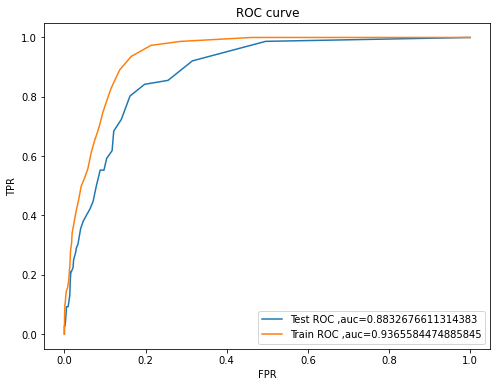

AUC on Test data is 0.8832676611314383
AUC on Train data is 0.9365584474885845
---------------------------


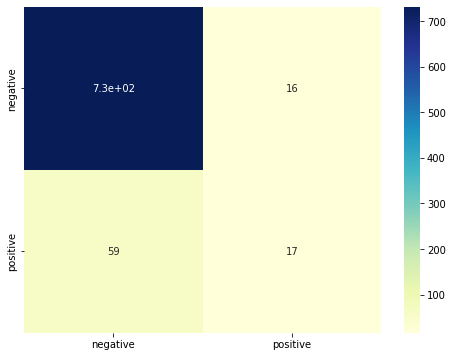

In [57]:
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k)
knn_optimal.fit(X_train_onehot, y_train_onehot)
pred_test = knn_optimal.predict_proba(X_test_onehot)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test_onehot, pred_test)
pred_train = knn_optimal.predict_proba(X_train_onehot)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train_onehot, pred_train)

aucScoreKNN = roc_auc_score(y_test_onehot,  pred_test)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot,pred_test)))
x.plot(fpr2, tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [58]:
knn = ['KNN','KNeighborsClassifier',"k = 41", roc_auc_score(y_train_onehot,pred_train), roc_auc_score(y_test_onehot,pred_test)]
results.loc[1] = knn

In [59]:
results.head()

model            Classifier hyper perameter  Train-AUC  Test-AUC
0  Naïve Bayes            GaussianNB            None   0.839159  0.794637
1          KNN  KNeighborsClassifier          k = 41   0.936558  0.883268

## Logistic Regression

In [60]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : np.logspace(-5, 5, 10),
    'solver' : ['newton-cg','liblinear','saga'],
    'max_iter' : [10, 100, 1000, 10000]
    }
]
logi = LogisticRegression()

#### Notes:

1. Hyperparameters for Logistic Regression
2. Penalty indicates which regularization to use
3. C decides how much weightage is given to Regularization
4. Solver is the technique used internally
5. max_iter is the number of iterations for convergence

In [61]:
#GridserchCV tries all possible combinations of hyperparameters to find best auc

clf = GridSearchCV(logi, param_grid = param_grid, scoring='roc_auc', cv = 5 )
best_clf = clf.fit(X_train_onehot, y_train_onehot)

In [62]:
# Training Logistic Regression
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

pred = best_clf.predict(X_test_onehot)
recallLR=recall_score(y_test_onehot, pred)
y_pred_prob = best_clf.predict_proba(X_test_onehot)
aucScoreLR = roc_auc_score(y_test_onehot,  y_pred_prob[:,1])
fprLR, tprLR, thresholds = roc_curve(y_test_onehot, y_pred_prob[:,1] )
print(confusion_matrix(y_test_onehot,pred))
print(classification_report(y_test_onehot,pred))
print("AUC score for LR is ",aucScoreLR)
print("recall for LR is ",recallLR)
#print("Test Accuracy score for LR is ",accuracy_score(y_test_onehot, pred))
predT=best_clf.predict(X_train_onehot)
#print("Train Accuracy score for LR is ",accuracy_score(y_cv_onehot, predT))
print("Best parameters for accuracy of LR are ",best_clf.best_params_)

[[722  26]
 [ 47  29]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       748
           1       0.53      0.38      0.44        76

    accuracy                           0.91       824
   macro avg       0.73      0.67      0.70       824
weighted avg       0.90      0.91      0.90       824

AUC score for LR is  0.909618632141852
recall for LR is  0.3815789473684211
Best parameters for accuracy of LR are  {'C': 0.2782559402207126, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


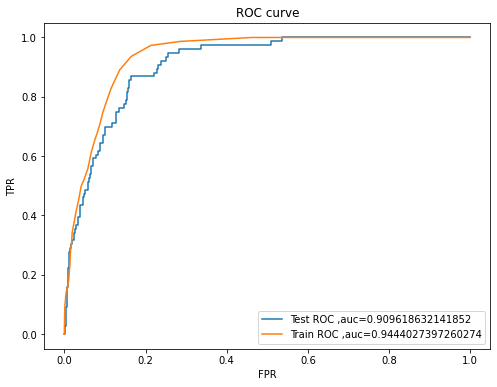

AUC on Test data is 0.909618632141852
AUC on Train data is 0.9444027397260274
---------------------------


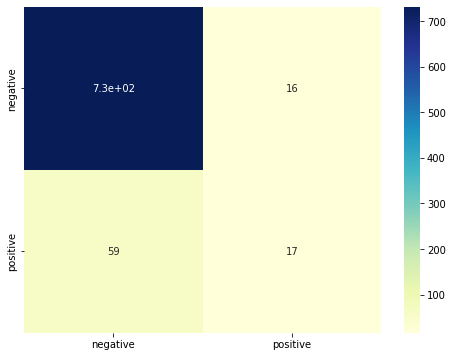

In [63]:
LR_optimal = LogisticRegression(C = 0.2783, max_iter=10000, penalty = 'l1', solver='liblinear')
LR_optimal.fit(X_train_onehot, y_train_onehot)
LR_pred_test = LR_optimal.predict_proba(X_test_onehot)[:,1]
LR_fpr1, LR_tpr1, LR_thresholds1 = roc_curve(y_test_onehot, LR_pred_test)
LR_pred_train = LR_optimal.predict_proba(X_train_onehot)[:,1]
LR_fpr2,LR_tpr2,LR_thresholds2 = roc_curve(y_train_onehot, pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(LR_fpr1, LR_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot,LR_pred_test)))
x.plot(LR_fpr2, LR_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, LR_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,LR_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,LR_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [64]:
LR = ['Logistic Regression','LogisticRegressionClassifier',"C =0.278, max_iter=10000, 'L1', solver='liblinear'", roc_auc_score(y_train_onehot,LR_pred_train), roc_auc_score(y_test_onehot,LR_pred_test)]
results.loc[2] = LR

In [65]:
results.head()

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.839159  0.794637  
1                                             k = 41   0.936558  0.883268  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.944403  0.909619

1. Logistic Regression gives a test auc score of 0. which is fairly good.
2. There is a gap between the train auc and test auc, which stands for there is a overfitting on the training set.
3. The recall of Logistic Regression is 0.3816, which is bad.

## SVM

In [66]:
classifier = SVC(probability=True)
svm_parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.1,0.5,0.9]},
            {'C':[1,10,100,1000],'kernel': ['poly'], 'degree':[2,3,4]} ]

In [67]:
clf = GridSearchCV(estimator=classifier,param_grid=svm_parameters,scoring='accuracy',cv=5)
best_clf = clf.fit(X_train_onehot,y_train_onehot)

In [68]:
# Training SVM
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test_onehot)
y_pred_prob = best_clf.predict_proba(X_test_onehot)
aucScoreSVM = roc_auc_score(y_test_onehot,  y_pred_prob[:,1])
recallSVM=recall_score(y_test_onehot, pred)
fprSVM, tprSVM, thresholds = roc_curve(y_test_onehot, y_pred_prob[:,1] )
print(confusion_matrix(y_test_onehot,pred))
print(classification_report(y_test_onehot,pred))
print("AUC score for SVM is ",aucScoreSVM)
print("recall for SVM is ",recallSVM)
predT=best_clf.predict(X_train_onehot)
print("Best parameters for SVM are ",best_clf.best_params_)

[[726  22]
 [ 47  29]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       748
           1       0.57      0.38      0.46        76

    accuracy                           0.92       824
   macro avg       0.75      0.68      0.71       824
weighted avg       0.91      0.92      0.91       824

AUC score for SVM is  0.8989586265128061
recall for SVM is  0.3815789473684211
Best parameters for SVM are  {'C': 1, 'kernel': 'linear'}


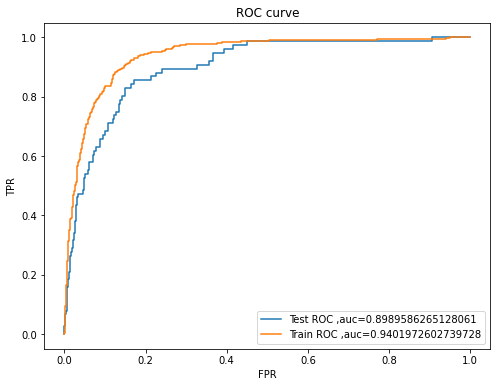

AUC on Test data is 0.8989586265128061
AUC on Train data is 0.9401972602739728
---------------------------


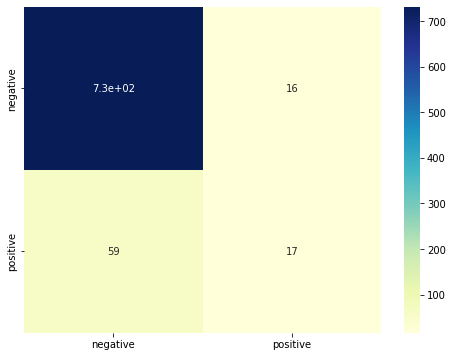

In [69]:
SVM_optimal = SVC(C = 1, kernel = 'linear', probability=True)
SVM_optimal.fit(X_train_onehot, y_train_onehot)
SVM_pred_test = SVM_optimal.predict_proba(X_test_onehot)[:,1]
SVM_fpr1, SVM_tpr1, SVM_thresholds1 = roc_curve(y_test_onehot, SVM_pred_test)
SVM_pred_train = SVM_optimal.predict_proba(X_train_onehot)[:,1]
SVM_fpr2, SVM_tpr2, SVM_thresholds2 = roc_curve(y_train_onehot, SVM_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(SVM_fpr1, SVM_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, SVM_pred_test)))
x.plot(SVM_fpr2, SVM_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, SVM_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,SVM_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,SVM_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [70]:
SVM = ['SVM','SVMClassifier',"C = 1, kernel = 'linear'", roc_auc_score(y_train_onehot,SVM_pred_train), roc_auc_score(y_test_onehot,SVM_pred_test)]
results.loc[3] = SVM

In [71]:
results.head()

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.839159  0.794637  
1                                             k = 41   0.936558  0.883268  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.944403  0.909619  
3                           C = 1, kernel = 'linear'   0.940197  0.898959

## Decision Tree

In [72]:
dt=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3,4,5,10,15],
            'min_samples_leaf':[1,2,3,4,5],
            'min_samples_split':[2,3,4,5],
            'criterion':['gini','entropy']}

In [73]:
clf = GridSearchCV(dt,parameters,scoring='roc_auc',verbose=True)
best_clf = clf.fit(X_train_onehot,y_train_onehot)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


In [74]:
# Training Decision Tree
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test_onehot)
y_pred_prob = best_clf.predict_proba(X_test_onehot)
aucScoreDT = roc_auc_score(y_test_onehot,  y_pred_prob[:,1])
recallDT=recall_score(y_test_onehot, pred)
fprDT, tprDT, thresholds = roc_curve(y_test_onehot, y_pred_prob[:,1] )
print(confusion_matrix(y_test_onehot,pred))
print(classification_report(y_test_onehot,pred))
print("AUC score for Decision Tree is ",aucScoreDT)
print("recall for Decision Tree is ",recallDT)
predT=best_clf.predict(X_train_onehot)
print("Best parameters for DT are ",best_clf.best_params_)

[[717  31]
 [ 44  32]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       748
           1       0.51      0.42      0.46        76

    accuracy                           0.91       824
   macro avg       0.73      0.69      0.71       824
weighted avg       0.90      0.91      0.91       824

AUC score for Decision Tree is  0.8676558542077116
recall for Decision Tree is  0.42105263157894735
Best parameters for DT are  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


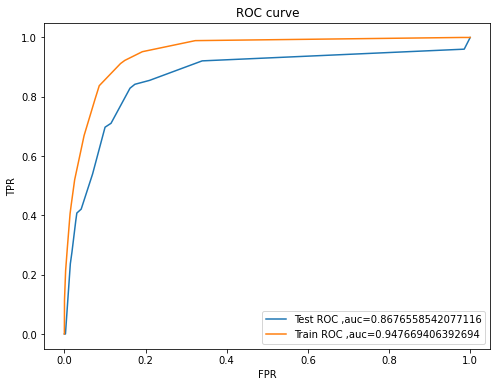

AUC on Test data is 0.8676558542077116
AUC on Train data is 0.947669406392694
---------------------------


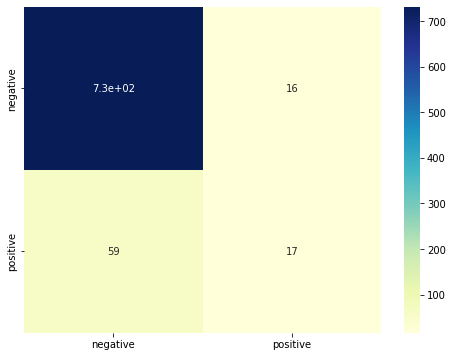

In [75]:
DT_optimal = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf=1, min_samples_split = 2)
DT_optimal.fit(X_train_onehot, y_train_onehot)
DT_pred_test = DT_optimal.predict_proba(X_test_onehot)[:,1]
DT_fpr1, DT_tpr1, DT_thresholds1 = roc_curve(y_test_onehot, DT_pred_test)
DT_pred_train = DT_optimal.predict_proba(X_train_onehot)[:,1]
DT_fpr2, DT_tpr2, DT_thresholds2 = roc_curve(y_train_onehot, DT_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(DT_fpr1, DT_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, DT_pred_test)))
x.plot(DT_fpr2, DT_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, DT_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

DT_train_auc = roc_auc_score(y_train_onehot,DT_pred_train)
DT_test_auc = roc_auc_score(y_test_onehot,DT_pred_test)

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,DT_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,DT_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [76]:
from sklearn import tree
plt.figure(figsize=(20, 16), dpi = 1200)
tree.plot_tree(DT_optimal)

[Text(0.5, 0.9, 'X[13] <= -1.07\nentropy = 0.511\nsamples = 3295\nvalue = [2920, 375]'),
 Text(0.25, 0.7, 'X[4] <= -0.358\nentropy = 0.996\nsamples = 418\nvalue = [225, 193]'),
 Text(0.125, 0.5, 'X[11] <= 0.947\nentropy = 0.639\nsamples = 148\nvalue = [124, 24]'),
 Text(0.0625, 0.3, 'X[37] <= 0.5\nentropy = 0.203\nsamples = 63\nvalue = [61, 2]'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 61\nvalue = [61, 0]'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.3, 'X[0] <= 0.134\nentropy = 0.825\nsamples = 85\nvalue = [63, 22]'),
 Text(0.15625, 0.1, 'entropy = 0.943\nsamples = 50\nvalue = [32, 18]'),
 Text(0.21875, 0.1, 'entropy = 0.513\nsamples = 35\nvalue = [31, 4]'),
 Text(0.375, 0.5, 'X[6] <= 0.929\nentropy = 0.954\nsamples = 270\nvalue = [101, 169]'),
 Text(0.3125, 0.3, 'X[4] <= 0.411\nentropy = 0.997\nsamples = 188\nvalue = [88, 100]'),
 Text(0.28125, 0.1, 'entropy = 0.993\nsamples = 124\nvalue = [68, 56]'),
 Text(0.34375, 0.1, 'entropy = 0.896\

In [77]:
#Top important features
all_features = X_train_onehot.columns

DT_feat = DT_optimal.feature_importances_
features = np.argsort(DT_feat)[::-1]
for i in features[0:20]:
    print(all_features[i])

duration
nr.employed
cons.conf.idx
pdays
euribor3m
education_unknown
age
campaign
job_entrepreneur
job_unemployed
job_technician
job_student
job_services
job_self-employed
job_retired
job_management
job_housemaid
default
previous
job_blue-collar


#### Notes:
1. As it is shown in the decision tree above, the top 5 features that have an impact on deposit is duration, nr.employed , cons.conf.idx, age and euribor3m. 3 out of 5 features is macroeconomic data.
2. Decision Tree model has a fair performance compared to other models

In [78]:
DT = ['DecisionTree','DecisionTreeClassifier',"criterion= 'entropy', max_depth= 4, min_samples_leaf=1, min_samples_split = 2", DT_train_auc, DT_test_auc]
results.loc[4] = DT

In [79]:
results.head()

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   
4         DecisionTree        DecisionTreeClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.839159  0.794637  
1                                             k = 41   0.936558  0.883268  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.944403  0.909619  
3                           C = 1, kernel = 'linear'   0.940197  0.898959  
4  criterion= 'entropy', max_depth= 4, min_sample...   0.947669  0.867656

## Random Forest

In [106]:
rf = RandomForestClassifier()

parameters={'bootstrap': [True, False],
 'max_depth': [1, 5, 10, 50, 100, None],
 'n_estimators': [100, 500, 1000,  2000]}

In [107]:
clf=GridSearchCV(estimator = rf, param_grid = parameters,scoring='roc_auc', cv = 5, verbose = True)
best_clf = clf.fit(X_train_onehot,y_train_onehot)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [108]:
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test_onehot)
y_pred_prob = best_clf.predict_proba(X_test_onehot)
aucScoreRF = roc_auc_score(y_test_onehot,  y_pred_prob[:,1])
recallRF=recall_score(y_test_onehot, pred)
fprRF, tprRF, thresholds = roc_curve(y_test_onehot, y_pred_prob[:,1] )
print(confusion_matrix(y_test_onehot,pred))
print(classification_report(y_test_onehot,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("recall for Random Forest is ",recallRF)
predT=best_clf.predict(X_train_onehot)
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[726  22]
 [ 50  26]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       748
           1       0.54      0.34      0.42        76

    accuracy                           0.91       824
   macro avg       0.74      0.66      0.69       824
weighted avg       0.90      0.91      0.90       824

AUC score for Random Forest is  0.8993456234168308
recall for Random Forest is  0.34210526315789475
Best parameters for Random Forest are  {'bootstrap': True, 'max_depth': 10, 'n_estimators': 2000}


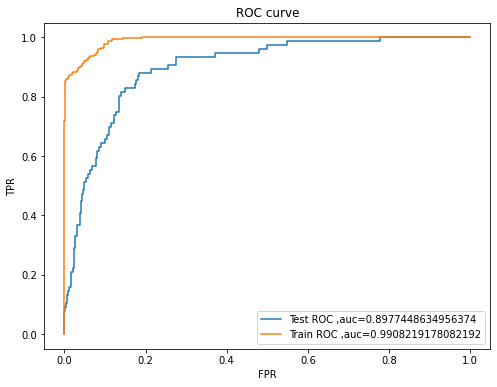

AUC on Test data is 0.8977448634956374
AUC on Train data is 0.9908219178082192
---------------------------


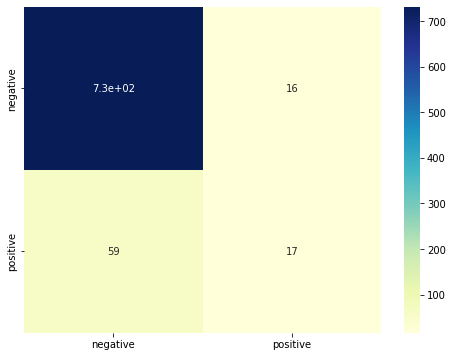

In [84]:
RF_optimal = RandomForestClassifier(bootstrap= True, max_depth= 10, n_estimators = 2000)
RF_optimal.fit(X_train_onehot, y_train_onehot)
RF_pred_test = RF_optimal.predict_proba(X_test_onehot)[:,1]
RF_fpr1, RF_tpr1, RF_thresholds1 = roc_curve(y_test_onehot, RF_pred_test)
RF_pred_train = RF_optimal.predict_proba(X_train_onehot)[:,1]
RF_fpr2, RF_tpr2, RF_thresholds2 = roc_curve(y_train_onehot, RF_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(RF_fpr1, RF_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, RF_pred_test)))
x.plot(RF_fpr2, RF_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, RF_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

RF_train_auc = roc_auc_score(y_train_onehot,RF_pred_train)
RF_test_auc = roc_auc_score(y_test_onehot,RF_pred_test)

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,RF_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,RF_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [85]:
#Top important features
all_features = X_train_onehot.columns

RF_feat = RF_optimal.feature_importances_
RF_features = np.argsort(RF_feat)[::-1]
for i in RF_features[0:20]:
    print(all_features[i])

duration
euribor3m
nr.employed
age
pdays
cons.conf.idx
poutcome
cons.price.idx
emp.var.rate
campaign
previous
housing
month_mar
loan
education_university.degree
job_admin.
contact_telephone
contact_cellular
marital_married
day_of_week_mon


In [86]:
RF = ['RandomForest','RandomForestClassifier',"max_depth= 10, n_estimators = 2000", RF_train_auc, RF_test_auc]
results.loc[5] = RF

In [87]:
results

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   
4         DecisionTree        DecisionTreeClassifier   
5         RandomForest        RandomForestClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.839159  0.794637  
1                                             k = 41   0.936558  0.883268  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.944403  0.909619  
3                           C = 1, kernel = 'linear'   0.940197  0.898959  
4  criterion= 'entropy', max_depth= 4, min_sample...   0.947669  0.867656  
5                 max_depth= 10, n_estimators = 2000   0.990822  0.897745

## XGBoost

In [88]:
params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 1).tolist(),
            'subsample': np.arange(0.5, 1.0, 0.1).tolist(),
        }

In [89]:
xgb_model = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
clf = GridSearchCV(xgb_model, param_grid = params, scoring = 'roc_auc',cv = skf.split(X_train_onehot, y_train_onehot),verbose=True)
best_clf = clf.fit(X_train_onehot,y_train_onehot)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


In [90]:
# Training XGBoost
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test_onehot)
y_pred_prob = best_clf.predict_proba(X_test_onehot)
aucScoreXGB = roc_auc_score(y_test_onehot,  y_pred_prob[:,1])
recallXGB = recall_score(y_test_onehot, pred)
fprXGB, tprXGB, thresholds = roc_curve(y_test_onehot, y_pred_prob[:,1] )
print(confusion_matrix(y_test_onehot,pred))
print(classification_report(y_test_onehot,pred))
print("AUC score for Random Forest is ",aucScoreXGB)
print("recall for Random Forest is ",recallXGB)
predT=best_clf.predict(X_train_onehot)
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[705  43]
 [ 35  41]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       748
           1       0.49      0.54      0.51        76

    accuracy                           0.91       824
   macro avg       0.72      0.74      0.73       824
weighted avg       0.91      0.91      0.91       824

AUC score for Random Forest is  0.9044645370109766
recall for Random Forest is  0.5394736842105263
Best parameters for Random Forest are  {'eta': 0.1, 'min_child_weight': 4, 'subsample': 0.7}


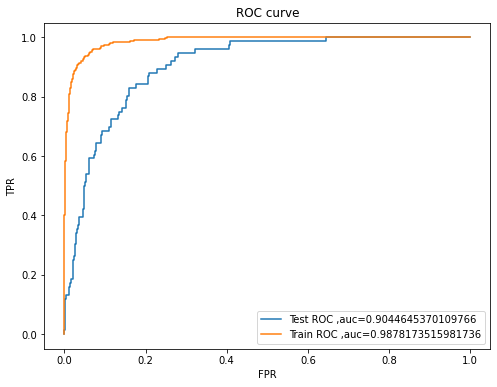

AUC on Test data is 0.9044645370109766
AUC on Train data is 0.9878173515981736
---------------------------


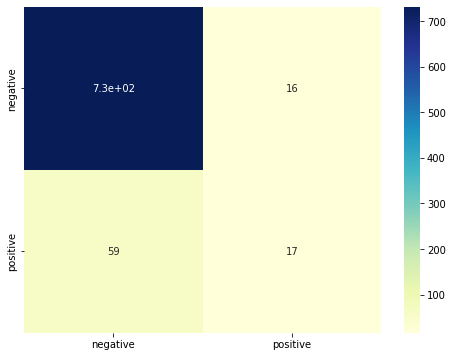

In [91]:
XGB_optimal = XGBClassifier(eta= 0.1, min_child_weight= 4, subsample= 0.7)
XGB_optimal.fit(X_train_onehot, y_train_onehot)
XGB_pred_test = XGB_optimal.predict_proba(X_test_onehot)[:,1]
XGB_fpr1, XGB_tpr1, XGB_thresholds1 = roc_curve(y_test_onehot, XGB_pred_test)
XGB_pred_train = XGB_optimal.predict_proba(X_train_onehot)[:,1]
XGB_fpr2, XGB_tpr2, XGB_thresholds2 = roc_curve(y_train_onehot, XGB_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(XGB_fpr1, XGB_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, XGB_pred_test)))
x.plot(XGB_fpr2, XGB_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, XGB_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

XGB_train_auc = roc_auc_score(y_train_onehot,XGB_pred_train)
XGB_test_auc = roc_auc_score(y_test_onehot,XGB_pred_test)

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,XGB_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,XGB_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [92]:
#Top important features
all_features = X_train_onehot.columns

XGB_feat = XGB_optimal.feature_importances_
XGB_features = np.argsort(XGB_feat)[::-1]
for i in XGB_features[0:20]:
    print(all_features[i])

nr.employed
duration
pdays
emp.var.rate
month_mar
poutcome
euribor3m
default
contact_cellular
month_jun
cons.price.idx
cons.conf.idx
job_admin.
month_oct
day_of_week_tue
loan
day_of_week_wed
month_nov
marital_married
job_blue-collar


<AxesSubplot:>

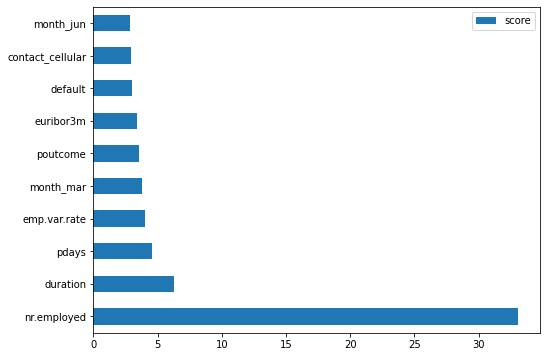

In [93]:
feature_important = XGB_optimal.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh')

In [94]:
XGB = ['XGBoost','XGBoostClassifier',"eta= 0.1, min_child_weight= 4, subsample= 0.7", XGB_train_auc, XGB_test_auc]
results.loc[6] = XGB

In [95]:
results

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   
4         DecisionTree        DecisionTreeClassifier   
5         RandomForest        RandomForestClassifier   
6              XGBoost             XGBoostClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.839159  0.794637  
1                                             k = 41   0.936558  0.883268  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.944403  0.909619  
3                           C = 1, kernel = 'linear'   0.940197  0.898959  
4  criterion= 'entropy', max_depth= 4, min_sample...   0.947669  0.867656  
5                 max_depth= 10, n_estimators = 2000   0.990822  0.897745  
6      eta= 0.1, min_child_weight= 4, subsample= 0.7   0.987817  0.904465

## LightGBM

In [96]:
params = {
   "num_leaves": [1, 5, 10, 15, 20, 50, 100],
   "max_depth": [1, 5, 10]
}

In [97]:
LGBM_model = LGBMClassifier()
clf = GridSearchCV(LGBM_model, param_grid = params, scoring = 'roc_auc',cv = 5,verbose=True)
best_clf = clf.fit(X_train_onehot,y_train_onehot)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [98]:
# Training LightGBM
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test_onehot)
y_pred_prob = best_clf.predict_proba(X_test_onehot)
aucScoreLGBM = roc_auc_score(y_test_onehot,  y_pred_prob[:,1])
recallLGBM = recall_score(y_test_onehot, pred)
fprLGBM, tprLGBM, thresholds = roc_curve(y_test_onehot, y_pred_prob[:,1] )
print(confusion_matrix(y_test_onehot,pred))
print(classification_report(y_test_onehot,pred))
print("AUC score for Random Forest is ",aucScoreLGBM)
print("recall for Random Forest is ",recallLGBM)
predT=best_clf.predict(X_train_onehot)
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[709  39]
 [ 37  39]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       748
           1       0.50      0.51      0.51        76

    accuracy                           0.91       824
   macro avg       0.73      0.73      0.73       824
weighted avg       0.91      0.91      0.91       824

AUC score for Random Forest is  0.9136293273290177
recall for Random Forest is  0.5131578947368421
Best parameters for Random Forest are  {'max_depth': 5, 'num_leaves': 5}


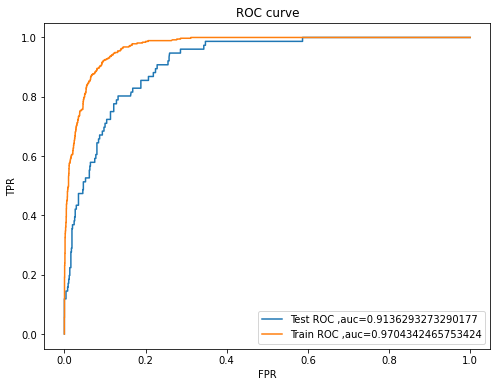

AUC on Test data is 0.9136293273290177
AUC on Train data is 0.9704342465753424
---------------------------


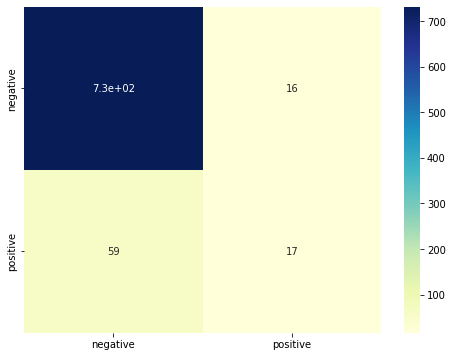

In [99]:
LGBM_optimal = LGBMClassifier(max_depth = 5, num_leaves = 5)
LGBM_optimal.fit(X_train_onehot, y_train_onehot)
LGBM_pred_test = LGBM_optimal.predict_proba(X_test_onehot)[:,1]
LGBM_fpr1, LGBM_tpr1, LGBM_thresholds1 = roc_curve(y_test_onehot, LGBM_pred_test)
LGBM_pred_train = LGBM_optimal.predict_proba(X_train_onehot)[:,1]
LGBM_fpr2, LGBM_tpr2, LGBM_thresholds2 = roc_curve(y_train_onehot, LGBM_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(LGBM_fpr1, LGBM_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, LGBM_pred_test)))
x.plot(LGBM_fpr2, LGBM_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, LGBM_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

LGBM_train_auc = roc_auc_score(y_train_onehot,LGBM_pred_train)
LGBM_test_auc = roc_auc_score(y_test_onehot,LGBM_pred_test)

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot, LGBM_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot, LGBM_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [100]:
#Top important features
all_features = X_train_onehot.columns

LGBM_feat = LGBM_optimal.feature_importances_
LGBM_features = np.argsort(LGBM_feat)[::-1]
for i in LGBM_features[0:20]:
    print(all_features[i])

duration
euribor3m
age
pdays
campaign
emp.var.rate
cons.price.idx
education_university.degree
nr.employed
month_mar
cons.conf.idx
month_may
contact_cellular
poutcome
job_self-employed
day_of_week_mon
job_retired
month_oct
month_nov
marital_divorced


In [109]:
LGBM = ['LightGBM','LGBMClassifier',"max_depth = 5, num_leaves = 5", LGBM_train_auc, LGBM_test_auc]
results.loc[7] = LGBM

In [102]:
results

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   
4         DecisionTree        DecisionTreeClassifier   
5         RandomForest        RandomForestClassifier   
6              XGBoost             XGBoostClassifier   
7             LightGBM                LGBMClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.839159  0.794637  
1                                             k = 41   0.936558  0.883268  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.944403  0.909619  
3                           C = 1, kernel = 'linear'   0.940197  0.898959  
4  criterion= 'entropy', max_depth= 4, min_sample...   0.947669  0.867656  
5                 max_depth= 10, n_estimators = 2000   0.990822  0.897745  
6      eta= 0.1, min_child_weight= 4, subsample= 0.7   0.987817  0.904465  
7                      max_depth = 5, num_leaves = 5   0.970434  0.913629

## ROC Curve

In [117]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [118]:
# add FPR, TPR and AUC for every algorithm
result_table=result_table.append({'classifiers':"Naive Bayes",'fpr':fprNB_test,'tpr':tprNB_test,'auc':test_auc_NB}, ignore_index=True)
result_table=result_table.append({'classifiers':"KNN Classifier",'fpr':fpr1,'tpr':tpr1,'auc':aucScoreKNN}, ignore_index=True)
result_table=result_table.append({'classifiers':"Logistic Regression",'fpr':fprLR,'tpr':tprLR,'auc':aucScoreLR}, ignore_index=True)
result_table=result_table.append({'classifiers':"SVM Classifier",'fpr':fprSVM,'tpr':tprSVM,'auc':aucScoreSVM}, ignore_index=True)
result_table=result_table.append({'classifiers':"Deciosion Tree",'fpr':fprDT,'tpr':tprDT,'auc':aucScoreDT}, ignore_index=True)
result_table=result_table.append({'classifiers':"Random Forest",'fpr':fprRF,'tpr':tprRF,'auc':aucScoreRF}, ignore_index=True)
result_table=result_table.append({'classifiers':"XGBoost Classifier",'fpr':fprXGB,'tpr':tprXGB,'auc':aucScoreXGB}, ignore_index = True)
result_table=result_table.append({'classifiers':"LightGBM Classifier",'fpr':fprLGBM,'tpr':tprLGBM,'auc':aucScoreLGBM}, ignore_index = True)

In [119]:
result_table.set_index('classifiers', inplace=True)

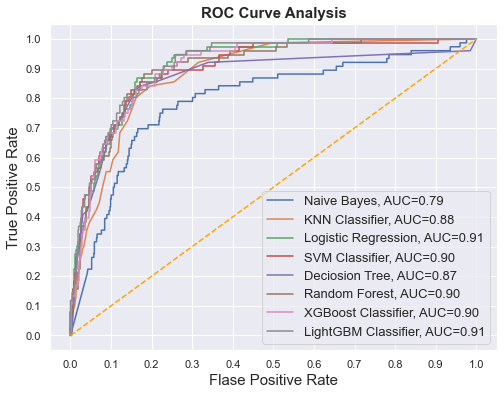

In [120]:
# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

# Plotting all ROC in one plot

sns.set()

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**Notes:** 
- Logistic Regression and LightGBM has best AUC on our small dataset.
- LightGBM and XGBoost have advantages in faster speed than Random Forest or SVM, say, under the same AUC score in this case.
- The recall of all the models are poor, the best recall score is XGBoost's 0.53.